In [1]:
import numpy as np#for matrix operation

import matplotlib.pyplot as plt#for visualiztion

import pandas as pd #for data maipution

In [2]:
dataFrame = pd.read_csv('ADRvsRating.csv')#read the data

dataFrame.head()#display the data

,ADR,Rating
0,85.0,117.0
1,83.5,110.0
2,78.2,102.0
3,68.1,97.0
4,66.3,86.0


In [11]:

dataFrame.describe()

,ADR,Rating
count,1000.000000,1000.000000
mean,75.866900,106.416000
std,19.055776,34.532585
min,19.700000,5.000000
25%,62.775000,82.000000
50%,74.650000,103.000000
75%,87.375000,127.000000
max,151.800000,239.000000


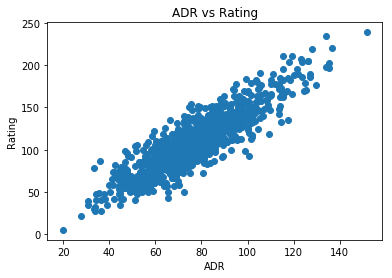

In [4]:
#visualize data
plt.scatter(dataFrame['ADR'],dataFrame['Rating'])#select data for x axis and y axis
plt.title('ADR vs Rating')#title of fig
plt.ylabel('Rating')#y label of fig
plt.xlabel('ADR')#x label 
plt.show()#plot or show the fig

In [5]:
def regulizer_l2(y,x,lamb):
    
    #as for penalty term in l2  regulizer is zero 
    #hence we are only cosidering error term
    xt = np.matrix.transpose(x)#take the transpose of matrix
    
    identity = np.identity(len(x[1,:]))#generate identity matrix 
    
    identity[0,0]=0#for l2 norm we cosider 
    
    #b^ = inv(xT.X + lambda*I).(xT.Y)
    betabar = np.dot(np.linalg.inv(np.add(np.dot(xt,x) , lamb * identity)), np.dot(xt,y))
    
    return betabar


In [6]:
adr = np.array(dataFrame['ADR'])#convert the data to vector form

rating = np.array(dataFrame['Rating'])#convert data to vector form

ones = np.ones(len(rating))#create the len of rating vector initiate to 1

design_simple = np.column_stack((ones,adr))#define design matrix

beta1 =regulizer_l2(rating, design_simple,0)#define b0 and b1 for simple equation
#beta1[0]=b0 and beta[1]=b1

print(beta1)

[-15.54790166   1.6076036 ]


In [7]:

#simiary for equation of order 5
adr2 = np.power(adr,2)
adr3 = np.power(adr,3)
adr4 = np.power(adr,4)
adr5 = np.power(adr,5)


design_mul = np.column_stack((ones,adr,adr2,adr3,adr4,adr5))

#here we are cosidering lambda=0
beta_mul = regulizer_l2(rating,design_mul,0)
print(beta_mul)

[ -8.63404520e+01   7.32971906e+00  -1.58414850e-01   1.97479859e-03
  -1.14349230e-05   2.52187969e-08]


In [8]:
#here we are cosidering lambda=5
beta_mul2 = regulizer_l2(rating,design_mul,5)
print(beta_mul2)

[ -5.87792008e+01   5.36456135e+00  -1.05980333e-01   1.31500725e-03
  -7.49490497e-06   1.62389542e-08]


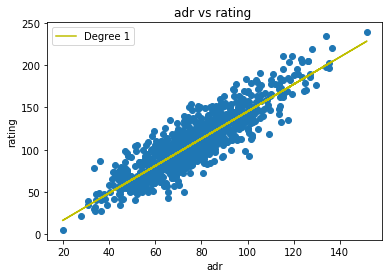

In [9]:
#plt.subplot(1,2,1)
plt.scatter(dataFrame['ADR'],dataFrame['Rating'])#plot data to 2d space
plt.title('adr vs rating ')#title of fig
plt.xlabel('adr')#x axis label
plt.ylabel('rating')# y axis label
simple, = plt.plot(adr, beta1[0] + adr*beta1[1],'y')#plot the regrssion line
plt.legend([simple],['Degree 1'])
plt.show()#display

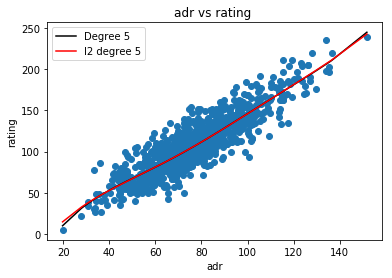

In [10]:
plt.scatter(dataFrame['ADR'],dataFrame['Rating'])#plot the data in 2d space
plt.title('adr vs rating ')#title
plt.xlabel('adr')#x label 
plt.ylabel('rating')# ylabel
multiple, = plt.plot(np.sort(adr), beta_mul[0] + np.sort(adr) * beta_mul[1] +
                     np.sort(adr2) * beta_mul[2] + np.sort(adr3) * beta_mul[3] +
                     np.sort(adr4) * beta_mul[4] + np.sort(adr5) * beta_mul[5],'k'
                    )
#plot best fitting line with lambda 0

rigid, = plt.plot(np.sort(adr), beta_mul2[0] + np.sort(adr) * beta_mul2[1] +
                     np.sort(adr2) * beta_mul2[2] + np.sort(adr3) * beta_mul2[3] +
                     np.sort(adr4) * beta_mul2[4] + np.sort(adr5) * beta_mul2[5],'r'
                    )
#plot best fitting line with lambda 1


plt.legend([multiple, rigid],['Degree 5','l2 degree 5'])
plt.show()#plot

 refernce https://github.com/hammadshaikhha